In [43]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:/Users/H.A/Downloads/Toronto_neighborhood_demographics_geographics_venues.csv')
df.head()

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues
0,Agincourt North,30280.0,19805.0,11850.0,13230.0,"[-79.2816161258827, 43.797405754163]",0.0,26.0
1,Agincourt South-Malvern West,21990.0,14535.0,8840.0,9860.0,"[-79.2891688527481, 43.7851873380096]",0.0,34.0
2,Alderwood,11900.0,7915.0,4520.0,6240.0,"[-79.5532040267975, 43.5954996876866]",1.0,17.0
3,Annex,29180.0,23495.0,15095.0,16770.0,"[-79.4121466573202, 43.6744312990078]",3.0,63.0
4,Banbury-Don Mills,26910.0,20555.0,9615.0,13030.0,"[-79.326504539789, 43.7325704244428]",2.0,14.0


In [44]:
df.isnull().sum()

Neighborhood                 0
Total population             0
number of educated people    0
number of 15-45              0
number of employers          0
long_latt                    0
number_gyms                  0
number_venues                0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Neighborhood               140 non-null    object 
 1   Total population           140 non-null    float64
 2   number of educated people  140 non-null    float64
 3   number of 15-45            140 non-null    float64
 4   number of employers        140 non-null    float64
 5   long_latt                  140 non-null    object 
 6   number_gyms                140 non-null    float64
 7   number_venues              140 non-null    float64
dtypes: float64(6), object(2)
memory usage: 8.9+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Neighborhood']=encoder.fit_transform(df['Neighborhood'])
df = df.drop(['long_latt'], axis=1)

In [47]:
df.columns


Index(['Neighborhood', 'Total population', 'number of educated people',
       'number of 15-45', 'number of employers', 'number_gyms',
       'number_venues'],
      dtype='object')

In [48]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [49]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,1
2,3
3,2
4,2
...,...
135,3
136,3
137,3
138,2


C:\Users\H.A\AppData\Local\Temp\ipykernel_7660\2849902236.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(scatter)


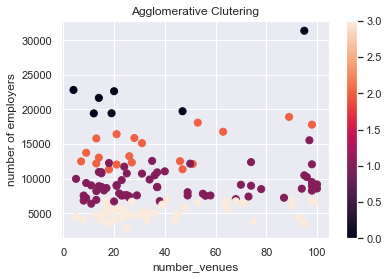

In [57]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['number_venues'] , df ['number of employers'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("number_venues")
ax.set_ylabel("number of employers")
plt.colorbar(scatter)

In [51]:
#KMean
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)

KMeans(n_clusters=4, random_state=0)

In [52]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,2
2,0
3,1
4,1
...,...
135,0
136,0
137,0
138,1


In [53]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[6.73333333e+01 1.09954630e+04 7.33518519e+03 4.54777778e+03
  5.38092593e+03 1.03703704e+00 4.05925926e+01]
 [7.06666667e+01 2.80168519e+04 1.91874074e+04 1.24572222e+04
  1.35640741e+04 7.40740741e-01 3.54444444e+01]
 [6.73461538e+01 1.82470192e+04 1.25159615e+04 7.77451923e+03
  8.71192308e+03 8.84615385e-01 4.39615385e+01]
 [9.77142857e+01 4.51021429e+04 3.24550000e+04 2.11550000e+04
  2.24414286e+04 8.57142857e-01 3.01428571e+01]]


In [54]:
Sum_of_squared_distances=[]
K= range(1,15)
for k in K:
    Km =KMeans(n_clusters=k)
    km =Km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\H.A\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


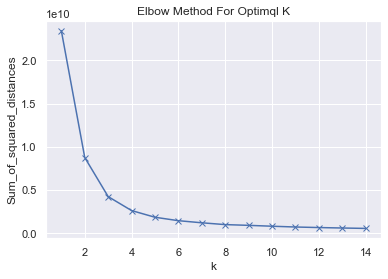

In [55]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimql K')
plt.show()

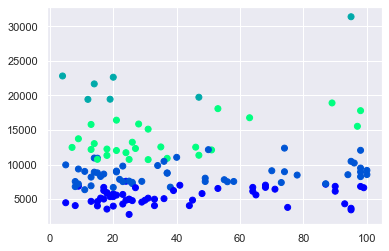

In [56]:
import matplotlib.pyplot as plt
plt.scatter(df ['number_venues'] , df ['number of employers'],
           c = KMeans(n_clusters = 4).fit_predict(df), cmap =plt.cm.winter) 
plt.show()